In [1]:
import numpy as np
import pywt
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [2]:
folder = './Dataset/with_mask/'
count = 1
for file_name in os.listdir(folder):
    source = folder + file_name
    destination = folder + str(count) + ".png"
    os.rename(source, destination)
    count += 1
print('All Files Renamed')

All Files Renamed


In [3]:
folder = './Dataset/without_mask/'
count = 1
for file_name in os.listdir(folder):
    source = folder + file_name
    destination = folder + str(count) + ".png"
    os.rename(source, destination)
    count += 1
print('All Files Renamed')

All Files Renamed


In [4]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [5]:
final_img_dirs = ['./Dataset/with_mask',
 './Dataset/without_mask']

In [6]:
img_dict = {}
for img_dir in final_img_dirs:
    if(img_dir.split('/')[-1] == 'without_mask'): #no mask - 0 & mask - 1
        label = '0'
    else:
        label = '1'
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    img_dict[label] = file_list
img_dict

{'1': ['./Dataset/with_mask/348.png',
  './Dataset/with_mask/412.png',
  './Dataset/with_mask/374.png',
  './Dataset/with_mask/360.png',
  './Dataset/with_mask/406.png',
  './Dataset/with_mask/638.png',
  './Dataset/with_mask/176.png',
  './Dataset/with_mask/88.png',
  './Dataset/with_mask/610.png',
  './Dataset/with_mask/604.png',
  './Dataset/with_mask/162.png',
  './Dataset/with_mask/189.png',
  './Dataset/with_mask/837.png',
  './Dataset/with_mask/77.png',
  './Dataset/with_mask/823.png',
  './Dataset/with_mask/63.png',
  './Dataset/with_mask/758.png',
  './Dataset/with_mask/764.png',
  './Dataset/with_mask/770.png',
  './Dataset/with_mask/228.png',
  './Dataset/with_mask/566.png',
  './Dataset/with_mask/200.png',
  './Dataset/with_mask/214.png',
  './Dataset/with_mask/572.png',
  './Dataset/with_mask/599.png',
  './Dataset/with_mask/598.png',
  './Dataset/with_mask/215.png',
  './Dataset/with_mask/573.png',
  './Dataset/with_mask/567.png',
  './Dataset/with_mask/201.png',
  './Dat

In [7]:
#found .DS_STORE file in each directory
for label, training_files in img_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
       
        if(type(img) == type(None)):
            print(training_image, 'not found')
            
        else:
            height, width, channels = img.shape
            print(training_image, height, width, channels)

./Dataset/with_mask/348.png 101 69 3
./Dataset/with_mask/412.png 100 100 3
./Dataset/with_mask/374.png 45 39 3
./Dataset/with_mask/360.png 165 81 3
./Dataset/with_mask/406.png 413 600 3
./Dataset/with_mask/638.png 104 77 3
./Dataset/with_mask/176.png 272 215 3
./Dataset/with_mask/88.png 431 389 3
./Dataset/with_mask/610.png 79 65 3
./Dataset/with_mask/604.png 87 74 3
./Dataset/with_mask/162.png 181 140 3
./Dataset/with_mask/189.png 224 235 3
./Dataset/with_mask/837.png 109 84 3
./Dataset/with_mask/77.png 100 100 3
./Dataset/with_mask/823.png 100 100 3
./Dataset/with_mask/63.png 196 123 3
./Dataset/with_mask/758.png 135 102 3
./Dataset/with_mask/764.png 100 100 3
./Dataset/with_mask/770.png 254 146 3
./Dataset/with_mask/228.png 334 500 3
./Dataset/with_mask/566.png 131 101 3
./Dataset/with_mask/200.png 136 88 3
./Dataset/with_mask/214.png 71 54 3
./Dataset/with_mask/572.png 650 867 3
./Dataset/with_mask/599.png 245 156 3
./Dataset/with_mask/598.png 104 87 3
./Dataset/with_mask/215.png 1

./Dataset/with_mask/464.png 1500 1365 3
./Dataset/with_mask/302.png 100 100 3
./Dataset/with_mask/316.png 146 112 3
./Dataset/with_mask/470.png 1200 1200 3
./Dataset/with_mask/458.png 55 53 3
./Dataset/with_mask/328.png 898 711 3
./Dataset/with_mask/300.png 306 161 3
./Dataset/with_mask/466.png 316 600 3
./Dataset/with_mask/472.png 439 322 3
./Dataset/with_mask/314.png 74 50 3
./Dataset/with_mask/499.png 143 103 3
./Dataset/with_mask/658.png 386 263 3
./Dataset/with_mask/880.png 720 1280 3
./Dataset/with_mask/894.png 345 301 3
./Dataset/with_mask/664.png 365 241 3
./Dataset/with_mask/670.png 1500 1500 3
./Dataset/with_mask/843.png 209 161 3
./Dataset/with_mask/857.png 72 63 3
./Dataset/with_mask/738.png 97 71 3
./Dataset/with_mask/710.png 216 148 3
./Dataset/with_mask/704.png 308 230 3
./Dataset/with_mask/512.png 194 108 3
./Dataset/with_mask/506.png 170 118 3
./Dataset/with_mask/507.png 73 60 3
./Dataset/with_mask/513.png 203 167 3
./Dataset/with_mask/705.png 129 68 3
./Dataset/with_m

./Dataset/with_mask/791.png 797 1200 3
./Dataset/with_mask/785.png 507 429 3
./Dataset/with_mask/784.png 152 99 3
./Dataset/with_mask/790.png 168 112 3
./Dataset/with_mask/747.png 199 129 3
./Dataset/with_mask/753.png 5412 4734 3
./Dataset/with_mask/828.png 392 284 3
./Dataset/with_mask/814.png 137 98 3
./Dataset/with_mask/800.png 222 147 3
./Dataset/with_mask/838.png 111 89 3
./Dataset/with_mask/804.png 619 1100 3
./Dataset/with_mask/810.png 1000 1000 3
./Dataset/with_mask/839.png 105 71 3
./Dataset/without_mask/348.png 121 116 3
./Dataset/without_mask/412.png 246 205 3
./Dataset/without_mask/374.png 428 320 3
./Dataset/without_mask/360.png 338 271 3
./Dataset/without_mask/406.png 136 140 3
./Dataset/without_mask/638.png 130 158 3
./Dataset/without_mask/176.png 127 140 3
./Dataset/without_mask/88.png 128 133 3
./Dataset/without_mask/610.png 428 320 3
./Dataset/without_mask/604.png 428 320 3
./Dataset/without_mask/162.png 428 320 3
./Dataset/without_mask/189.png 149 146 3
./Dataset/wit

./Dataset/without_mask/402.png 960 768 3
./Dataset/without_mask/364.png 639 639 3
./Dataset/without_mask/370.png 428 320 3
./Dataset/without_mask/416.png 124 146 3
./Dataset/without_mask/459.png 428 320 3
./Dataset/without_mask/317.png 147 143 3
./Dataset/without_mask/471.png 160 147 3
./Dataset/without_mask/465.png 144 143 3
./Dataset/without_mask/303.png 131 151 3
./Dataset/without_mask/897.png 428 320 3
./Dataset/without_mask/883.png 124 160 3
./Dataset/without_mask/673.png 275 183 3
./Dataset/without_mask/667.png 136 148 3
./Dataset/without_mask/854.png 129 145 3
./Dataset/without_mask/840.png 150 154 3
./Dataset/without_mask/698.png 428 320 3
./Dataset/without_mask/868.png 136 141 3
./Dataset/without_mask/707.png 109 144 3
./Dataset/without_mask/713.png 480 480 3
./Dataset/without_mask/920.png 428 320 3
./Dataset/without_mask/934.png 183 275 3
./Dataset/without_mask/908.png 428 320 3
./Dataset/without_mask/539.png 143 140 3
./Dataset/without_mask/263.png 208 165 3
./Dataset/withou

./Dataset/without_mask/708.png 152 160 3
./Dataset/without_mask/913.png 124 149 3
./Dataset/without_mask/907.png 147 140 3
./Dataset/without_mask/906.png 131 156 3
./Dataset/without_mask/912.png 128 144 3
./Dataset/without_mask/709.png 494 441 3
./Dataset/without_mask/721.png 150 151 3
./Dataset/without_mask/735.png 590 513 3
./Dataset/without_mask/872.png 140 141 3
./Dataset/without_mask/866.png 347 263 3
./Dataset/without_mask/696.png 428 320 3
./Dataset/without_mask/682.png 247 204 3
./Dataset/without_mask/669.png 433 327 3
./Dataset/without_mask/655.png 137 128 3
./Dataset/without_mask/899.png 247 209 3
./Dataset/without_mask/641.png 203 249 3
./Dataset/without_mask/657.png 129 121 3
./Dataset/without_mask/643.png 143 129 3
./Dataset/without_mask/694.png 120 140 3
./Dataset/without_mask/858.png 147 125 3
./Dataset/without_mask/680.png 146 138 3
./Dataset/without_mask/870.png 133 147 3
./Dataset/without_mask/864.png 433 320 3
./Dataset/without_mask/723.png 427 336 3
./Dataset/withou

In [8]:
X, y = [], []
for label, training_files in img_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if(type(img) == type(None)):
            pass
        else:
            scaled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scaled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(int(label))

In [9]:
y[0]

1

In [10]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(962, 4096)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
n_components = 150
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print(pca.explained_variance_ratio_)

[0.16097889 0.09678829 0.0532432  0.03119245 0.02993645 0.02066479
 0.01787226 0.01781539 0.01426754 0.01126615 0.00994244 0.00946893
 0.00823062 0.00819045 0.00747718 0.00720377 0.00714321 0.00673954
 0.00610258 0.00573431 0.00541391 0.00525086 0.00503664 0.00478326
 0.00468671 0.00444953 0.0042919  0.00419117 0.00395251 0.00386187
 0.00376264 0.00368812 0.00357542 0.00354692 0.00341881 0.00334193
 0.00326983 0.00322604 0.00319802 0.00313503 0.00306697 0.00295378
 0.00292588 0.00287823 0.00277154 0.00270177 0.00268383 0.00263251
 0.00261928 0.00255985 0.00253806 0.00251165 0.0024741  0.00241378
 0.00238526 0.00234649 0.00232409 0.0022801  0.00225089 0.00220644
 0.0021988  0.00217645 0.00211547 0.00211374 0.00207606 0.00204754
 0.00204202 0.00203674 0.00200306 0.00198539 0.0019385  0.00191408
 0.00189047 0.00188074 0.00186019 0.00183924 0.00182533 0.00182354
 0.00178848 0.00177106 0.00175999 0.00174218 0.00173031 0.00172591
 0.00170086 0.00169004 0.00166121 0.00165612 0.0016399  0.0016

In [14]:
import joblib  
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

In [15]:

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid) 
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [17]:
y_pred = clf.predict(X_test_pca)
print(y_pred)
acc = accuracy_score(y_test,y_pred)
print('Accuracy:',acc)

[0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0]
Accuracy: 0.91701244813278


Text(69.0, 0.5, 'Actual')

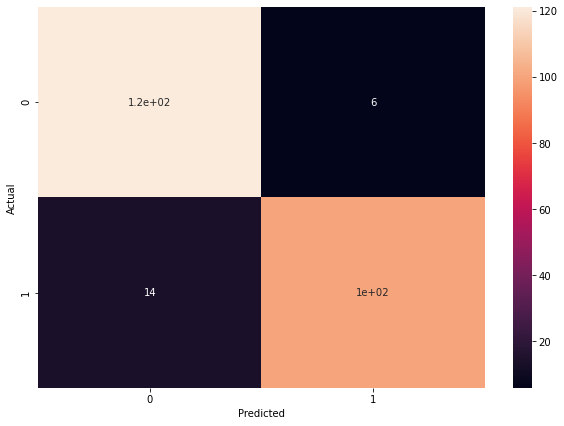

In [18]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
clf.score(X_test_pca,y_test)

0.91701244813278

In [20]:
import joblib  
joblib.dump(clf, 'clf_model.pkl')

['clf_model.pkl']

In [1]:
import joblib
savedclf = joblib.load('clf_model.pkl')
savedpca = joblib.load('pca_model.pkl')

In [2]:
import numpy as np
import pywt
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [3]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [4]:
#Realtime face detection
import cv2
cap = cv2.VideoCapture(0)
faceCascade = cv2.CascadeClassifier("./haarcascade/haarcascade_frontalface_default.xml")

cap.set(3, 1240)#Width
cap.set(4, 640)#Height
cap.set(10, 100)#brightness

while True:
    success, img = cap.read() 
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(imgGray, 1.1, 4)
    if(len(faces)>0):
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        combined_img_np = np.array(combined_img).reshape(1,4096).astype(float)
        test_img_pca = savedpca.transform(combined_img_np)
        test_pred = savedclf.predict(test_img_pca)
        if(test_pred[0]==0):
            text = "No Mask"

        else:
            text = "Mask"

    for (x, y, w, h) in faces: 
        cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(img, text, (x+w+5, y+h+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 150,0), 1)

    cv2.imshow('Output', img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.waitKey(0) & 0xFF
cap.release() #Release the resources after recording
cv2.destroyAllWindows()
cv2.waitKey(1)

-1